## Alzheimer Principal Components Analysis

### Essential Imports

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import image

import seaborn as sns
import matplotlib.pyplot as plt

from skimage.transform import resize
from skimage.io import imread
from skimage.color import rgb2gray

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



sns.set_palette('Paired')
sns.set_style("whitegrid")

In [2]:
# class1 = 'VeryMildDemented'
# class2 = 'MildDemented'
# class3 = 'ModerateDemented'
# class0 = 'NonDemented'

class1 = '/content/drive/MyDrive/Alzheimer/Dataset/Very_Mild_Demented'
class2 = '/content/drive/MyDrive/Alzheimer/Dataset/Mild_Demented'
class3 = '/content/drive/MyDrive/Alzheimer/Dataset/Moderate_Demented'
class0 = '/content/drive/MyDrive/Alzheimer/Dataset/Non_Demented'

### Step 1: Data Extraction / Cleaning / Aggregation

In this step, data is extracted from each source, cleaned, resized, flattened and finally combined with all the sources to from an aggregated dataframe that consists of all the classes.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
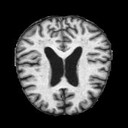

In [3]:
imread((class1+'/verymild.jpg'))

So our actual image size is 128 X 128.

In [4]:
def file_append(class_path):
  image_array = []
  curr_path = os.path.join(os.getcwd(), class_path)
  cnt = 0
  file_list = [k for k in os.listdir(curr_path) if '.jpg' in k]
  for x in file_list:
    img_path = os.path.join(curr_path, x)
    img = imread(img_path)
    img = resize(img, (60, 60, 3))
    img = img.flatten()
    image_array.append(img)
  return image_array

class1_img = file_append(class1)
class2_img = file_append(class2)
class3_img = file_append(class3)
class0_img = file_append(class0)

In [5]:
df1 = pd.DataFrame(class1_img)
df1['label'] = 1
df2 = pd.DataFrame(class2_img)
df2['label'] = 2
df3 = pd.DataFrame(class3_img)
df3['label'] = 3
df0 = pd.DataFrame(class0_img)
df0['label'] = 0

df = pd.concat([df0, df1, df2, df3], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,10791,10792,10793,10794,10795,10796,10797,10798,10799,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Step 1.1: Checking for null values

In [6]:
df.isnull().sum().sum()

0

In [ ]:
#df.to_csv('/content/drive/MyDrive/Alzheimer/alzheimer_dataset.csv', index=False)

### Step 2: EDA of varibale

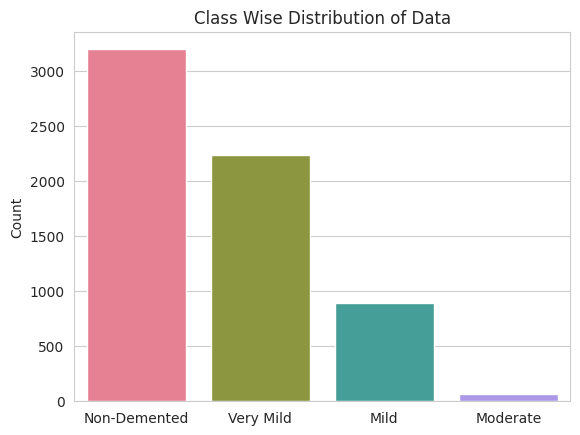

In [18]:
lab = ['Non-Demented', 'Very Mild', 'Mild', 'Moderate']
sns.barplot(x=lab, y=df['label'].value_counts(), hue=lab, palette='husl');
plt.ylabel('Count');
plt.title('Class Wise Distribution of Data');

The distribution makes sense, as the percentage of people who have severe cases is much lower than mild cases.

### Step 3: Splitting entire dataset into train and test sets

In [8]:
X, y = df[df.columns[:-1]], df['label']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=121)

In [10]:
X_train.shape, X_test.shape

((1280, 10800), (5120, 10800))

### Step 4: Data Preprocessing Pipeline for Scaling and Dimensionality Reduction

In [11]:
data_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.9))
])
data_pipe.fit(X_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.9))])

In [12]:
X_train = data_pipe.transform(X_train)
X_test = data_pipe.transform(X_test)

In [13]:
y_train

1484    0
5335    1
4168    1
1658    0
6001    0
       ..
2113    0
3572    3
1631    0
4565    1
3394    0
Name: label, Length: 1280, dtype: int64

In [14]:
print(f"Original Data Dimension: {df.shape[1]} features")
print(f"After PCA Data Dimension: {X_train.shape[1]} features")

Original Data Dimension: 10801 features
After PCA Data Dimension: 386 features


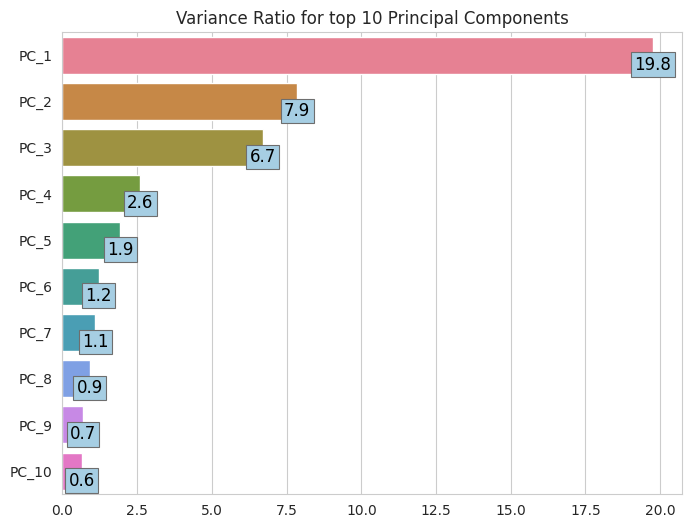

In [19]:
top10_var = [x*100 for x in data_pipe.named_steps['pca'].explained_variance_ratio_[:10]]
PC_labels = ['PC_'+str(x+1) for x in range(len(top10_var))]

plt.figure(figsize=(8, 6))
plt.title("Variance Percentage for top 10 Principal Components")

bar = sns.barplot(x=top10_var, y=PC_labels, hue=PC_labels, palette='husl')
for p in bar.patches:
  x = p.get_width()
  y = p.get_y()
  bar.annotate(format(x, '.1f'), (x, y), ha='center', va='center', size=12,
               color='black', xytext=(0,-20), textcoords='offset points',
               bbox=dict(boxstyle='square, pad = 0.2', lw=0.8,
                          ec='#6e6e6e'))

plt.title("Variance Ratio for top 10 Principal Components")
plt.show();

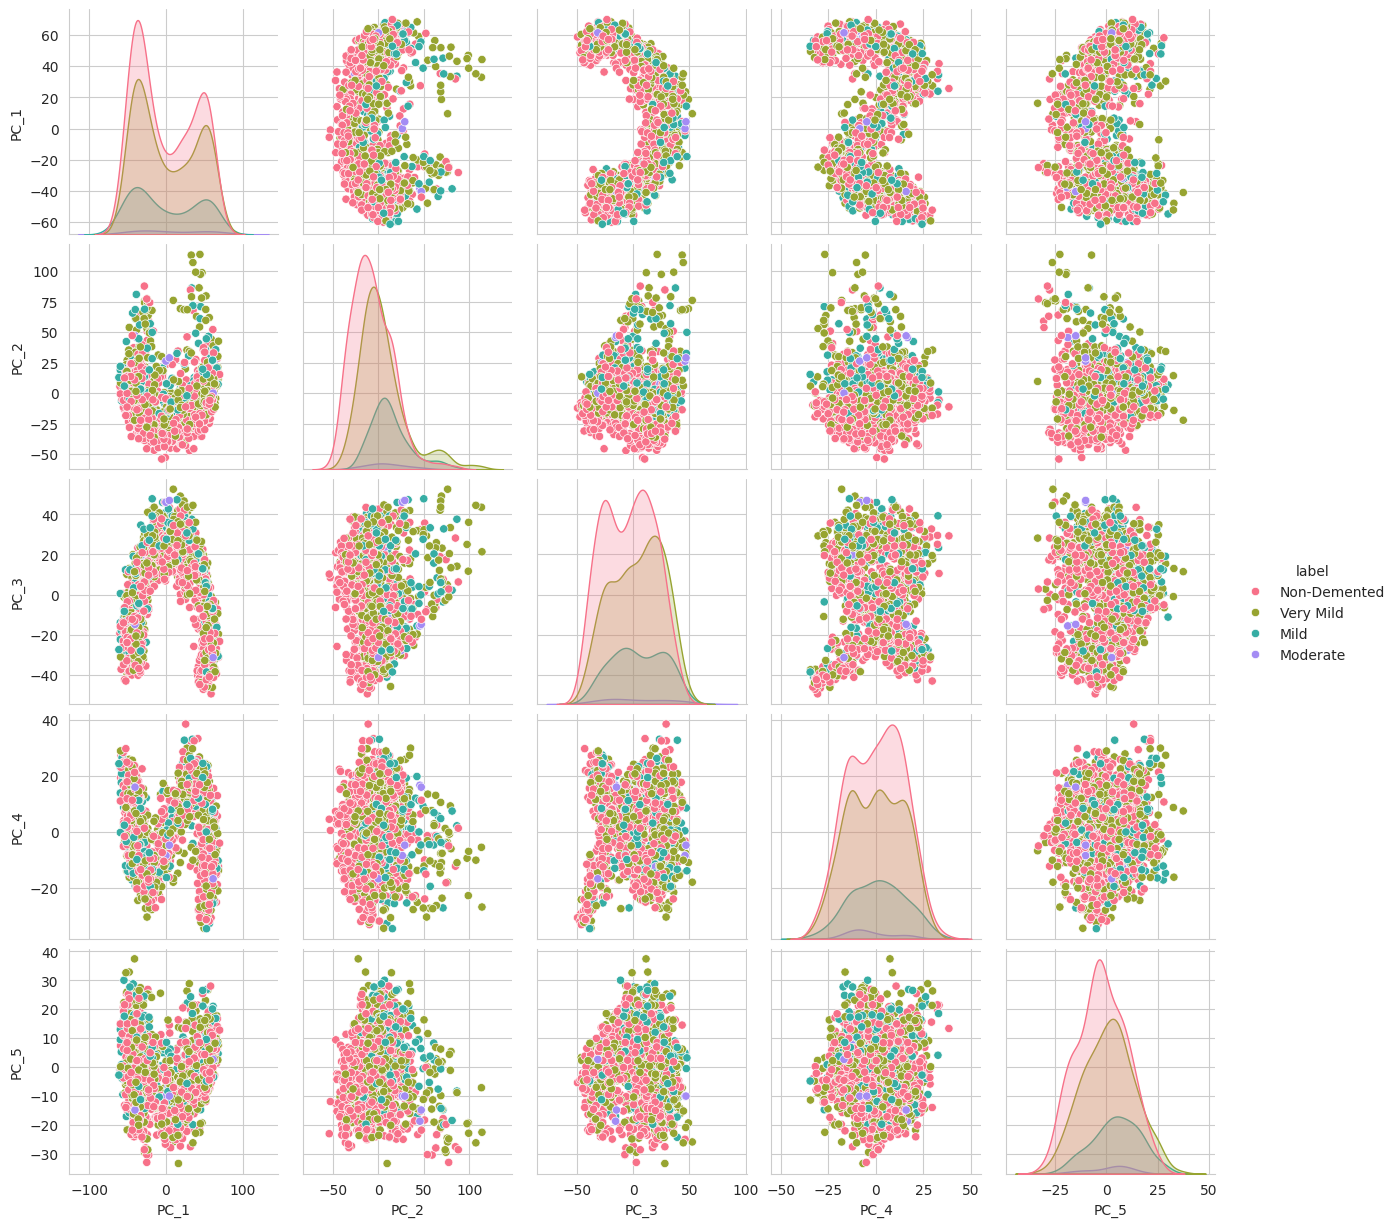

In [20]:
scatter_plots = X_train[:, :5]
data_cols = ['PC_'+str(x+1) for x in range(scatter_plots.shape[1])]
scatter_df = pd.DataFrame(scatter_plots, columns=data_cols)
scatter_df['label'] = y_train.reset_index(drop=True)

label_map = {0: 'Non-Demented', 1: 'Very Mild', 2: 'Mild', 3: 'Moderate'}
scatter_df['label'] = scatter_df['label'].map(label_map)

sns.pairplot(scatter_df, hue='label', palette='husl');

From the above plot, it is very clear that, the data is not separable in lower dimension, as we can see in scatter plots. Hence it is not easy to find a linearly separable boundary, thus it is my assumption that we might need to opt for SVM or other methods for high accuracy.

### Step 5: Data Modelling

In [37]:
# Base Function for Training Models
def train_model(model, search_grid):
    """
    Trains a model using grid search with cross-validation.

    Parameters:
    model: estimator object
        The machine learning model to be trained.
    search_grid: dict or list of dictionaries
        The parameter grid to search over.
    X_train: array-like
        Training data.
    y_train: array-like
        Training labels.

    Returns:
    grid_result: GridSearchCV object
        The result of the grid search.
    """
    cv = KFold(n_splits=10)
    grid_search = GridSearchCV(estimator=model, param_grid=search_grid, n_jobs=-1,
                               cv=cv, scoring='accuracy', error_score=0)
    grid_result = grid_search.fit(X_train, y_train)
    return grid_result

def scatter_plots(grid_result, title):
    """
    Plots cross-validation accuracies.

    Parameters:
    grid_result: GridSearchCV object
        The result of the grid search.
    title: str
        The title for the plot.
    """
    sns.set_palette('husl')
    cv_results = grid_result.cv_results_
    lr_scores = [max(cv_results[f'split{i}_test_score']) for i in range(10)]

    sns.lineplot(x=range(1, 11), y=lr_scores)
    plt.scatter(range(1, 11), lr_scores)

    plt.xlabel('Cross Validation Steps')
    plt.ylabel('Model Accuracy')
    plt.title(f'Cross Validation Accuracies for {title}', size=15)

    max_score_idx = np.argmax(lr_scores)
    plt.scatter(max_score_idx + 1, lr_scores[max_score_idx], c='red', marker='o', s=200)
    plt.annotate(format(lr_scores[max_score_idx], '.3f'), (max_score_idx + 1, lr_scores[max_score_idx]), size=15)
    plt.show()

def cf_plot(grid_result, title):
    """
    Plots the confusion matrix and prints the classification report.

    Parameters:
    grid_result: GridSearchCV object
        The result of the grid search.
    X_test: array-like
        Test data.
    y_test: array-like
        Test labels.
    title: str
        The title for the plot.
    """
    y_pred = grid_result.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(9, 7))
    sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues', annot_kws={'size': 15})
    plt.xlabel('Predicted Label', size=15)
    plt.ylabel('Actual Label', size=15)
    plt.title(f"Confusion Matrix for {title}", size=15)
    plt.show()
    print('\n')
    print('-'*150)
    print(classification_report(y_test, y_pred))

#### Step 5.1: Logistic Regression

In [30]:
lr_model = LogisticRegression(max_iter=100)

solvers = ['newton-cg']
penalty = ['l2'] 
c_values = [1.0, 0.1, 0.01, 0.001]
lr_search_grid = dict(solver=solvers, penalty=penalty, C=c_values)

lr_grid_result = train_model(lr_model, lr_search_grid)

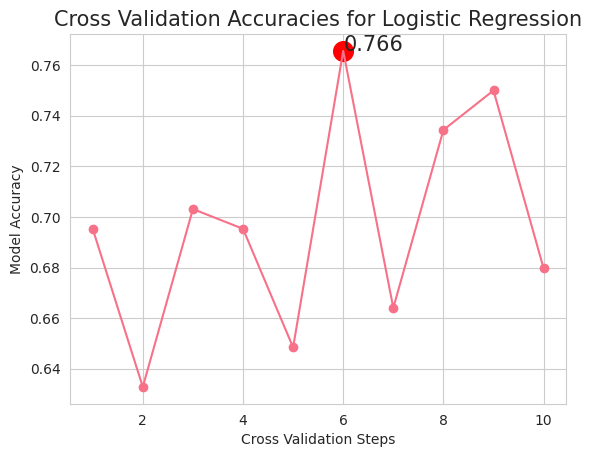

In [31]:
scatter_plots(lr_grid_result, 'Logistic Regression')

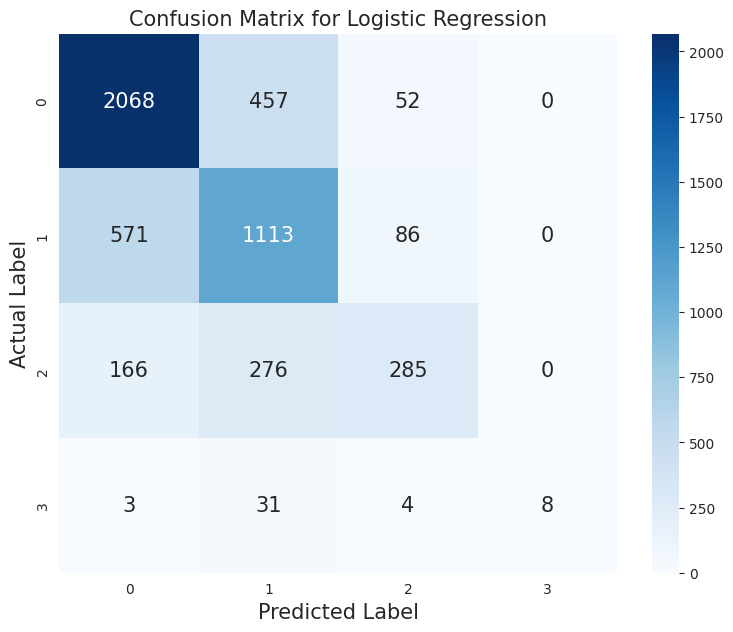



------------------------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.80      0.77      2577
           1       0.59      0.63      0.61      1770
           2       0.67      0.39      0.49       727
           3       1.00      0.17      0.30        46

    accuracy                           0.68      5120
   macro avg       0.75      0.50      0.54      5120
weighted avg       0.68      0.68      0.67      5120



In [38]:
cf_plot(lr_grid_result, 'Logistic Regression')

#### Step 5.2: SVM

In [39]:
svm_model = SVC()
c_ = [0.5, 1, 2, 5, 10]
kernel = ['rbf', 'poly']

search_parameters = dict()
search_parameters['C'] = c_
search_parameters['kernel'] = kernel

svm_grid_result = train_model(svm_model, search_parameters)
svm_grid_result.best_params_

{'C': 5, 'kernel': 'rbf'}

In [40]:
svm_grid_result.score(X_test, y_test)

0.81640625

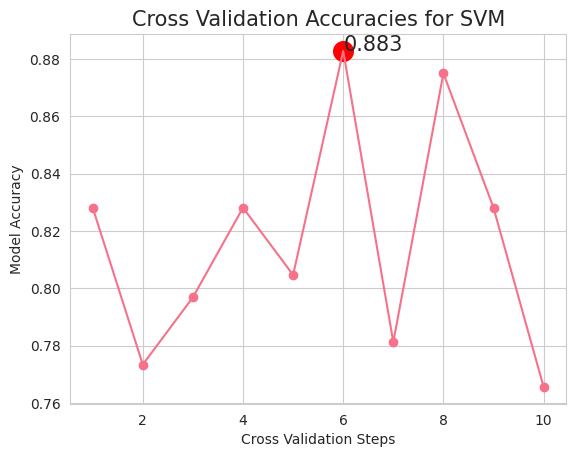

In [43]:
scatter_plots(svm_grid_result, 'SVM')

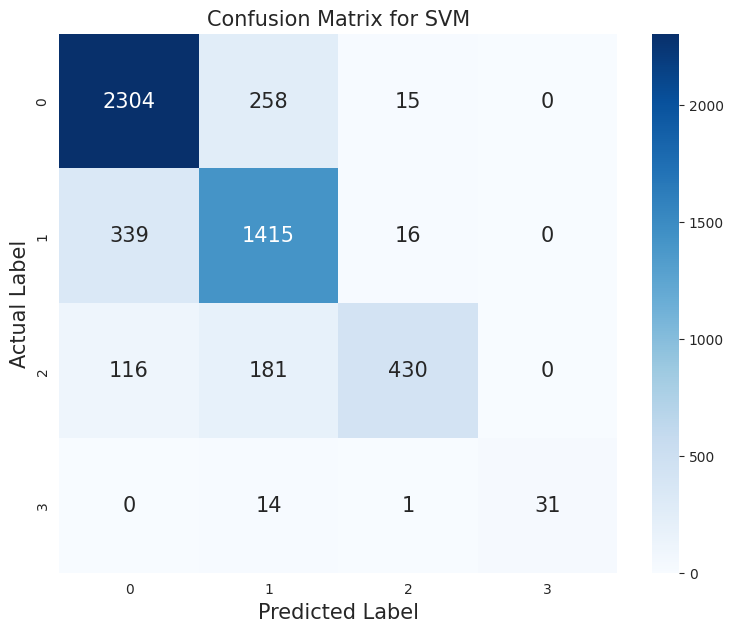



------------------------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      2577
           1       0.76      0.80      0.78      1770
           2       0.93      0.59      0.72       727
           3       1.00      0.67      0.81        46

    accuracy                           0.82      5120
   macro avg       0.88      0.74      0.79      5120
weighted avg       0.82      0.82      0.81      5120



In [44]:
cf_plot(svm_grid_result, 'SVM')

In [45]:
rf_model= RandomForestClassifier()
n_estimators = [10, 100, 500,1000]
max_features = ['sqrt', 'log2']

rf_grid = dict(n_estimators=n_estimators,max_features=max_features)
rf_grid_result  = train_model(rf_model,rf_grid)

rf_grid_result.best_params_

{'max_features': 'sqrt', 'n_estimators': 100}

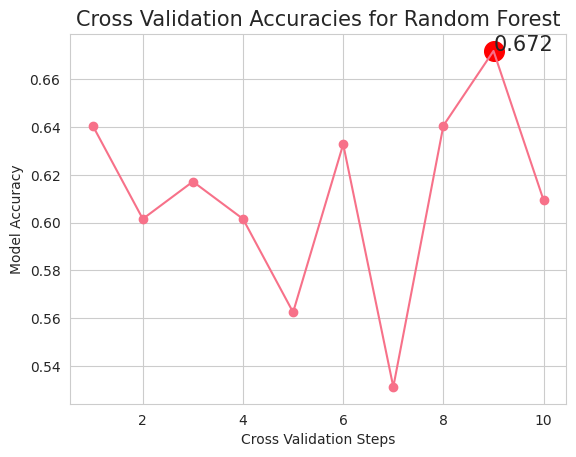

In [46]:
scatter_plots(rf_grid_result,'Random Forest')

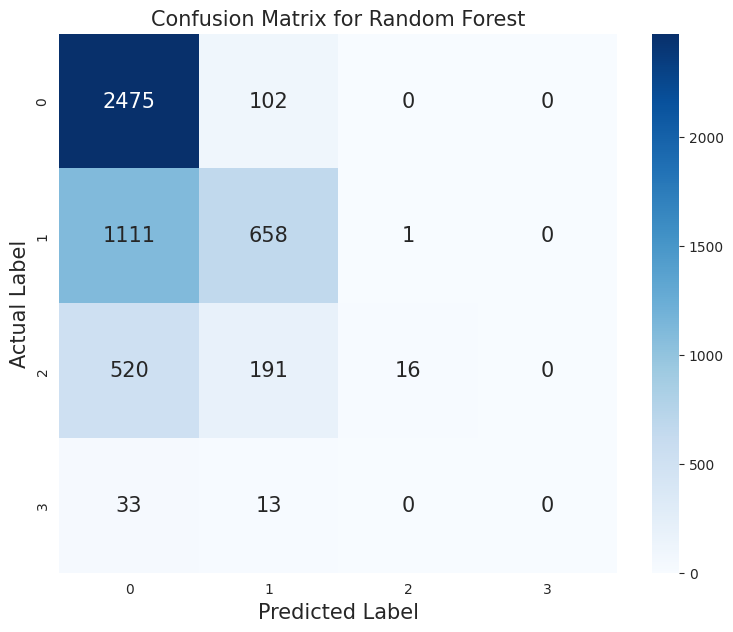



------------------------------------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.96      0.74      2577
           1       0.68      0.37      0.48      1770
           2       0.94      0.02      0.04       727
           3       0.00      0.00      0.00        46

    accuracy                           0.62      5120
   macro avg       0.56      0.34      0.32      5120
weighted avg       0.67      0.62      0.54      5120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
cf_plot(rf_grid_result,'Random Forest')

### Model Comparisons

In [48]:
data = {'models': ["Logistic Regression","SVM","Random Forest"],
        'accuracy': [0.75,0.99,0.71],
        'precision':[0.81,0.99,0.64],
        'recall':[0.73,0.99,0.42],
       }

# pass column names in the columns parameter
df = pd.DataFrame.from_dict(data)
df

,models,accuracy,precision,recall
0,Logistic Regression,0.75,0.81,0.73
1,SVM,0.99,0.99,0.99
2,Random Forest,0.71,0.64,0.42
